# Part II - Fashion Mnist
#####  @ Haim Goldfisher

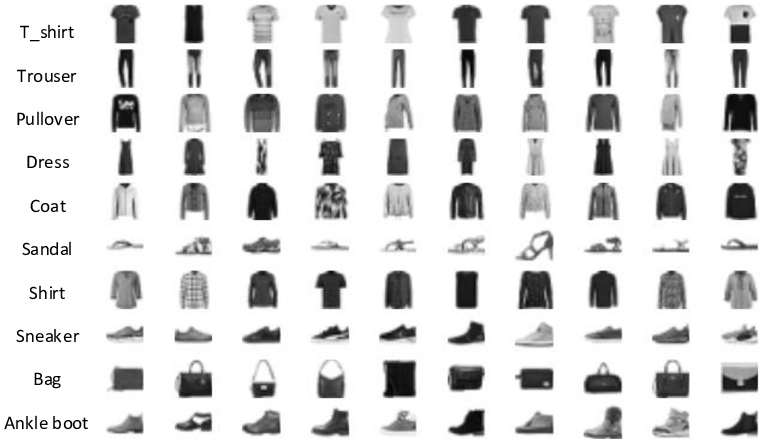

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import make_pipeline

In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
df_train = pd.read_csv("C:\\Haim\\Anaconda\\fashion_mnist_train.csv")

df_train.sample(n = 4, random_state = 8).sort_values(by = 'label')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
56059,2,0,0,0,0,0,2,0,0,0,...,5,4,0,45,147,144,4,0,0,0
32997,4,0,0,0,0,0,0,1,2,0,...,3,0,0,191,198,0,0,0,0,0
50681,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13395,8,0,0,0,0,0,0,0,0,0,...,211,214,208,199,197,208,212,193,42,0


In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()



As we can see, we have the label - the type of cloth, and 0-255 value for each pixel in the frame.

In [5]:
df_train.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
df_train.shape # 60000 rows and 785 columns (784 pixels + label column)

(60000, 785)

In [7]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [8]:
df_train.isnull().sum().sum() # the dataset has no NaN values

0

As we can see, the biggest number inside the dataset is 255. Using int64 is unnecessary in such low values.
We would like to change the data type from int64 to int8 and int16 for lower memory usage.

In [9]:
## downcasting loop
for column in df_train:
    if df_train[column].dtype == 'int64':
        df_train[column]=pd.to_numeric(df_train[column], downcast='integer')

In [10]:
df_train.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int16(780), int8(5)
memory usage: 89.6 MB


You can see that we saved 270 MB right now.

In [11]:
df_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int8)

There are 10 labels, it means that there are 10 different types of clothing to be classified:

* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot

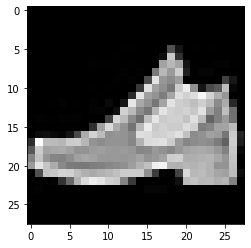

In [12]:
X_train = df_train.drop(['label'], axis=1).to_numpy()

img = X_train[1].reshape(28,28)
plt.imshow(img, plt.cm.gray)
plt.show()

## Data Processing

The things that are important to consider before start to work with the data:
- As we can see, when pixels value is 0 (black pixel), it means that its an empty pixel. We would like to drop pixels which are empty in each frame.
- We would like to understand which cloths are difficult to classify, and which are easier.

In [147]:
for i in len(df_train.columns):
    if df_train.columns[i]

785

pixel656    1
pixel293    1
pixel404    1
pixel255    1
pixel498    1
           ..
pixel327    1
pixel616    1
pixel769    1
pixel639    1
pixel588    1
Length: 785, dtype: int64

In [33]:
target = df_train['label'] # the feature we would like to predict
data = df_train.drop(['label'], axis = 1) # we will drop target from data, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data, target, random_state=0) #train\test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

C:\Haim\Anaconda\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.85